# Predicting Pokemon Types

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## The Pokedex Data

Here is a data set containing stats for all of the Pokemon in a Pokedex.

In [253]:
data = pd.read_csv("../data/pokedex.csv")

In [254]:
data

,name,height,weight,hp,attack,defense,special-attack,special-defense,speed,type,subtype
0,bulbasaur,0.7,6.9,45,49,49,65,65,45,grass,poison
1,ivysaur,1.0,13.0,60,62,63,80,80,60,grass,poison
2,venusaur,2.0,100.0,80,82,83,100,100,80,grass,poison
3,charmander,0.6,8.5,39,52,43,60,50,65,fire,NaN
4,charmeleon,1.1,19.0,58,64,58,80,65,80,fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1276,koraidon-gliding-build,3.5,303.0,100,135,115,85,100,135,fighting,dragon
1277,miraidon-low-power-mode,2.8,240.0,100,85,100,135,115,135,electric,dragon
1278,miraidon-drive-mode,2.8,240.0,100,85,100,135,115,135,electric,dragon
1279,miraidon-aquatic-mode,2.8,240.0,100,85,100,135,115,135,electric,dragon


### There are many types of Pokemon

In [255]:
data.type.value_counts()

water       157
normal      135
grass       110
electric     95
bug          93
psychic      83
rock         80
fire         79
dark         59
fighting     57
dragon       52
ghost        51
ground       47
poison       47
steel        47
ice          43
fairy        33
flying       13
Name: type, dtype: int64

### Let's work with the 2 most common types

In [257]:
data = data.loc[data["type"].isin(["water", "normal"])]

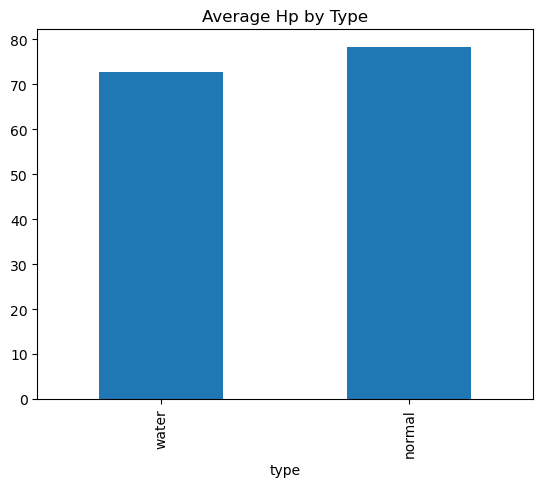

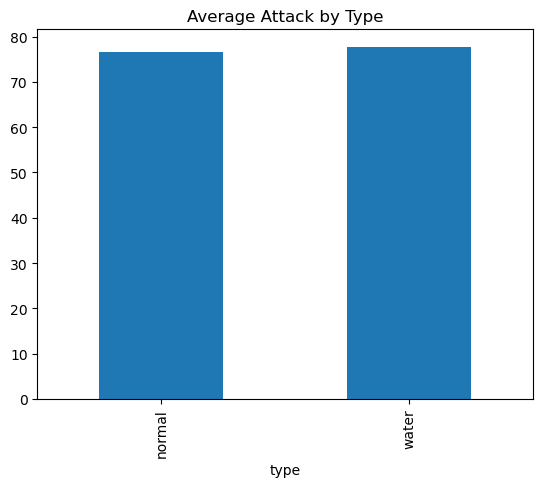

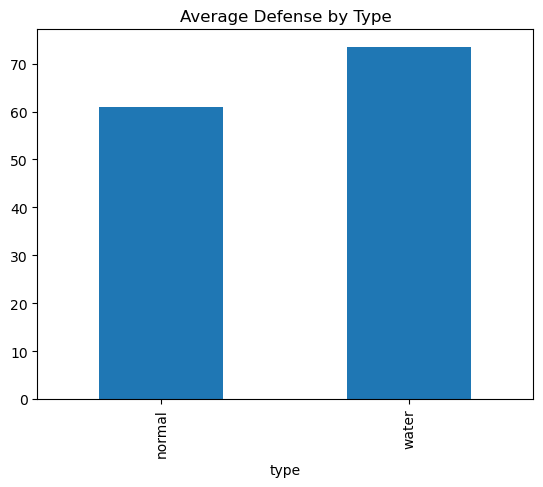

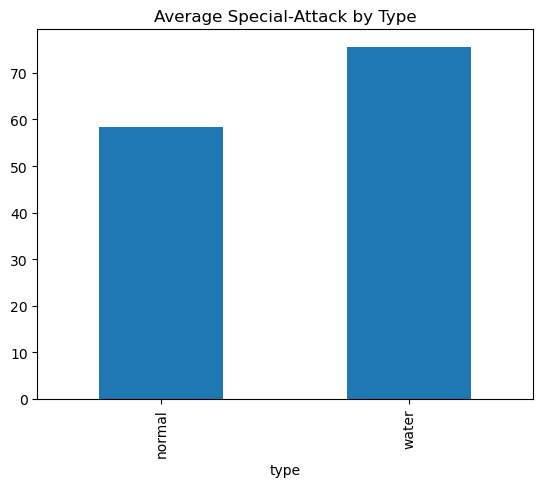

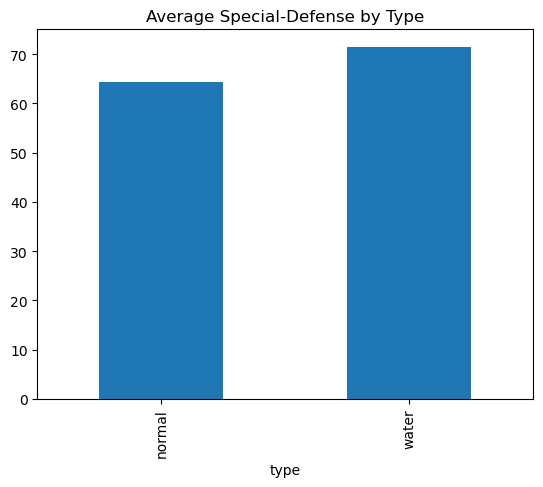

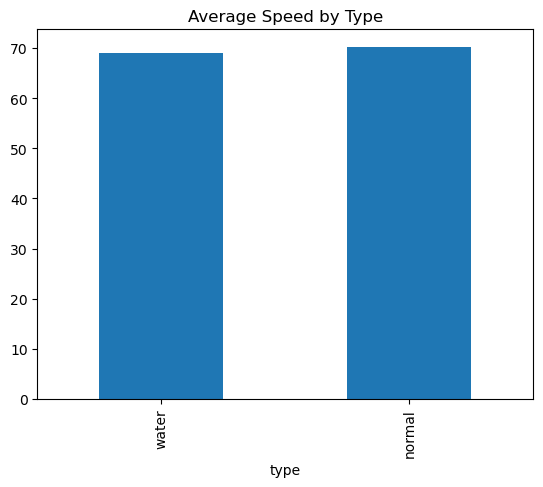

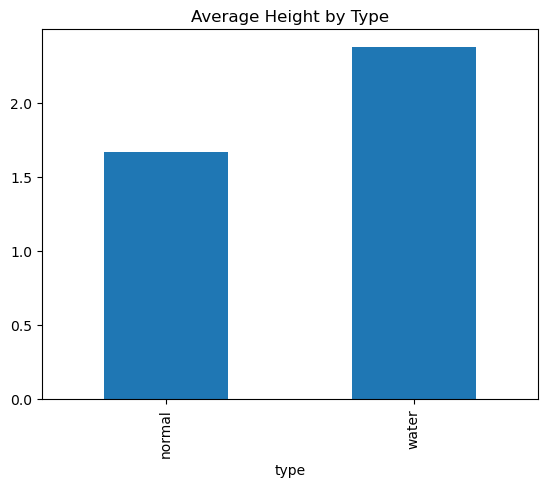

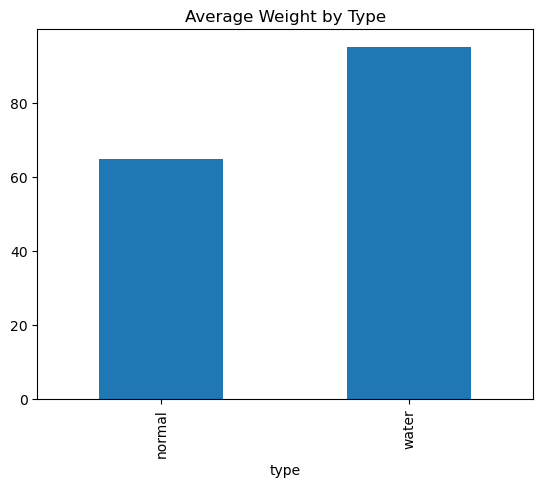

In [258]:
for col in ["hp", "attack", "defense", "special-attack", "special-defense","speed","height", "weight"]:
    data.groupby("type")[col].mean().sort_values().plot.bar()
    plt.title(f"Average {col.title()} by Type");
    plt.show();

## Fitting the Model

Here are the features we are working with...

In [259]:
features = [
    'height', 
    'weight', 
    'hp', 
    'attack', 
    'defense', 
    'special-attack', 
    'special-defense', 
    'speed'
]

We need to train our model on part of the data and so we split it into training and testing data.

In [263]:
n = len(data)

In [264]:
randomized_data = data.iloc[random.sample(range(n), n)]

In [270]:
split = int(n * 0.8)

training_data = randomized_data[:split]
testing_data = randomized_data[split:]

### Fitting a Simple Neural Network Model

In [266]:
model = MLPClassifier((500,500))

model.fit(training_data[features], training_data["type"]);

### Let's see some example predictions

In [267]:
example = testing_data.iloc[:3]
example

,name,height,weight,hp,attack,defense,special-attack,special-defense,speed,type,subtype
381,kyogre,4.5,352.0,100,100,90,150,140,90,water,NaN
1269,squawkabilly-blue-plumage,0.6,2.4,82,96,51,45,51,92,normal,flying
1130,gumshoos-totem,1.4,60.0,88,110,60,55,60,45,normal,NaN


In [268]:
model.predict(example[features])

array(['water', 'normal', 'normal'], dtype='<U6')

### We can look at all of the predictions at once!

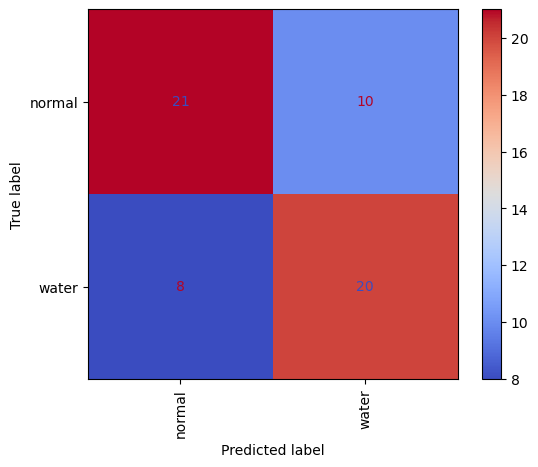

In [269]:
ConfusionMatrixDisplay.from_estimator(
    model, testing_data[features], 
    testing_data["type"],
    xticks_rotation="vertical",
    cmap="coolwarm"
)